# 1 deque 

In [1]:
from collections import deque

In [3]:
a = deque()

In [8]:
a.append(1)
a.append(2)

In [9]:
a

deque([1, 1, 2])

In [19]:
b = deque(maxlen=5)
for i in range(10):
    b.append(i)

In [20]:
for i in b:
    print(i)

5
6
7
8
9


In [18]:
# 读取数据的测试
with open("test.txt") as f:
    for line in f:
        print(line.strip())

<_io.TextIOWrapper name='test.txt' mode='r' encoding='UTF-8'>
1 2 3
2 3 4
3 4 5
1 3 5


# 2寻找最大的数据

In [53]:
from heapq import  heappop, nlargest, nsmallest, heappush
import numpy as np

In [31]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
heappop(a.tolist())
# 必须使用list
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
heappush(a.tolist(), 33)

In [37]:
print(type(a))
nlargest(3, a)
nsmallest(3, a)


<class 'numpy.ndarray'>


[0, 1, 2]

In [40]:
dicts = {k:v for k, v in zip("abcd",np.arange(4))}
dicts

{'a': 0, 'b': 1, 'c': 2, 'd': 3}

In [48]:
class item:
    def __init__(self, item):
        self.item = item
    
    def __repr__(self):
        return "item({})".format(item)

In [49]:
test =item("s")

In [51]:
test.__repr__()
test

item(<class '__main__.item'>)

# 利用heap实现 LOF算法

In [64]:
data = np.array([[1, 3, 3],[2, 3, 4],[4, 1, 3],
                 [4, 3, 17], [6, 5, 10], [5, 7, 13]])
data

array([[ 1,  3,  3],
       [ 2,  3,  4],
       [ 4,  1,  3],
       [ 4,  3, 17],
       [ 6,  5, 10],
       [ 5,  7, 13]])

In [66]:
def get_dist(vec1, vec2):
    return np.sqrt(sum(np.power((vec1 - vec2), 2)))

# get_dist(data[0], data[1])

1.4142135623730951

In [109]:
def get_dist_matrix(data):
    m, n = data.shape
    matrix = np.zeros((m, m))
    for index, line in enumerate(data):
        for j in  range(m):
            if index != j:
                matrix[index,j] = get_dist(data[index], data[j])
    return np.round(matrix, 2).tolist()


ma = get_dist_matrix(data)
ma

[[0.0, 1.41, 3.61, 14.32, 8.83, 11.49],
 [1.41, 0.0, 3.0, 13.15, 7.48, 10.3],
 [3.61, 3.0, 0.0, 14.14, 8.31, 11.7],
 [14.32, 13.15, 14.14, 0.0, 7.55, 5.74],
 [8.83, 7.48, 8.31, 7.55, 0.0, 3.74],
 [11.49, 10.3, 11.7, 5.74, 3.74, 0.0]]

In [136]:
data = np.array([[1, 3],[2, 4],[4, 3],
                 [2, 3], [20, 2], [10, 17]])
print(data)
ma = get_dist_matrix(data)
ma

[[ 1  3]
 [ 2  4]
 [ 4  3]
 [ 2  3]
 [20  2]
 [10 17]]


[[0.0, 1.41, 3.0, 1.0, 19.03, 16.64],
 [1.41, 0.0, 2.24, 1.0, 18.11, 15.26],
 [3.0, 2.24, 0.0, 2.0, 16.03, 15.23],
 [1.0, 1.0, 2.0, 0.0, 18.03, 16.12],
 [19.03, 18.11, 16.03, 18.03, 0.0, 18.03],
 [16.64, 15.26, 15.23, 16.12, 18.03, 0.0]]

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

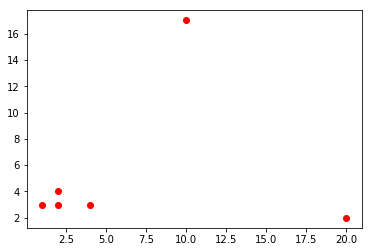

In [143]:
plt.scatter(np.array(data)[:,0],np.array(data)[:,1], color="red")

In [142]:
de = slice(1,3)
for i in range(6):
    dists = ma[i]
    rd_x = nsmallest(3, dists)[de]
    lrd_x = np.round(1 / (sum(rd_x) + 0.01), 2)
    score = cald_lrd_k(rd_x, dists) / (lrd_x + 0.01)
    print(np.round(score, 2))

2.17
2.17
3.64
1.61
18.5
16.25


In [125]:
def cald_lrd_k(rd_x, dists):
    sums = 0
    for value in rd_x:
        index = dists.index(value)
        
        temp_rd = nsmallest(3, ma[index])[de]
        temp_rdx = np.round(1 / sum(temp_rd), 2)
        sums += temp_rdx
    return sums

In [91]:
rd = nsmallest(3, ma[1])
de = slice(1,3)
print(rd[de][0])
print(rd[de])
ma[1].tolist().index(rd[de][1])

1.41
[1.41, 3.0]


2

In [94]:
rdx = np.round(1 / sum(rd[de]), 2)
rdx

0.23

In [108]:
total = 0
for value in  rd[de]:
    index = ma[1].tolist().index(value) # 计算k degree 的 index
    temp_rd = nsmallest(3, ma[index])[de]
    temp_rdx = np.round(1 / sum(temp_rd), 2)
    
    print(temp_rd)
    print(temp_rdx)
    total += temp_rdx
    # temp = (ma[1].tolist().index(rd[de][i]))
    print(index)
print(total)

0.35 / rdx

[1.41, 3.61]
0.2
0
[3.0, 3.61]
0.15
2
0.35


1.5217391304347825

In [79]:
ind = np.argsort(ma[0])
ind

array([0, 1, 2, 4, 5, 3])

array([[ 0.  ,  1.41,  3.61, 14.32,  8.83, 11.49],
       [ 1.41,  0.  ,  3.  , 13.15,  7.48, 10.3 ],
       [ 3.61,  3.  ,  0.  , 14.14,  8.31, 11.7 ],
       [14.32, 13.15, 14.14,  0.  ,  7.55,  5.74],
       [ 8.83,  7.48,  8.31,  7.55,  0.  ,  3.74],
       [11.49, 10.3 , 11.7 ,  5.74,  3.74,  0.  ]])